In [3]:
#%% Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

## Part 1: Simulate a geometric Brownian motion dX(t) = mu*X(t)*dt + sigma*X(t)*dW(t)

In [4]:
# Define parameters and time grid
npaths = 20000 # number of paths
T = 1 # time horizon
nsteps = 200 # number of time steps
dt = T/nsteps # time step
t = np.linspace(0,1, num=200+1)# observation times

# Model parameters
mu, sigma = 0.2, 0.4 # model parameters
X0 = 2 #inital stock price at t=0

In [5]:
## Method 1: ABM transform
# Compute the increments of an equivalent arithmetic Brownian motion Y = log (X/X0) 
dY = (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn(nsteps,npaths)

# Simulate ABM process: cumulate the increments
Y = np.cumsum(dY,axis =0)

# Simulate the GBM: expnentiate the levels of the ABM
X = np.empty([nsteps+1,npaths])
X[0,:] = X0
X[1:,:] = X0*np.exp(Y)

In [6]:
# GBM Method 2: Euler-Method

#Allocate and initialise all paths
X = np.empty([nsteps+1,npaths])
X[0,:] = X0

# Sample standard Gaussian random numbers
N = np.random.randn(nsteps,npaths)

#Compute and accumulate the increments
for i in range(nsteps):
    #plain Euler
    X[i+1,:] = X[i,:]+mu*X[i,:]*dt+sigma*np.sqrt(dt)*X[i,:]*N[i,:] 

    #Euler with analytical Moments
    X[i+1,:] = X[i,:]*np.exp(mu*dt)+sigma*np.sqrt(dt)*X[i,:]*N[i,:] 


## Part 2: Plot Theoretical and Simulated values of E(X) and V(X)


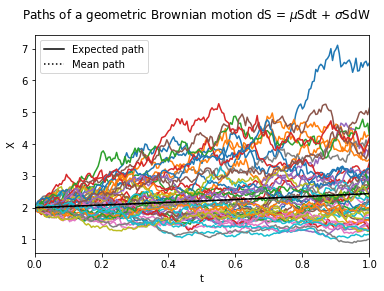

In [7]:
#Compute theoretical expected value
EX = X0*np.exp(mu*t)

#Estimate mean of X(t) from the simulations
SimulatedMean = np.mean(X,1)

# Plot the simulated paths, expected value and sample mean
fig, ax = plt.subplots()
fig.suptitle(r'Paths of a geometric Brownian motion dS = $\mu$Sdt + $\sigma$SdW')
ax.plot(t,X[:,::400])
ax.plot(t,EX,'k',label = 'Expected path')
ax.plot(t,SimulatedMean,'k:',label ='Mean path')
ax.set(xlim=[0,1], xlabel='t', ylabel='X')
ax.legend()

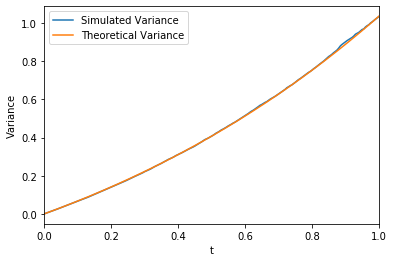

In [8]:
#Compute theoretical Variance
VAR=X0**2*np.exp(t*2*(mu-sigma**2/2)+4*sigma**2/2*t)-EX**2

#Estimate variance from the simulations
SimulatedVar=np.var(X,1)

#Plot the Time Series and also plot the asymptote in the limit
fig, ax = plt.subplots()
ax.plot(t,SimulatedVar,label = 'Simulated Variance')
ax.plot(t,VAR,label = 'Theoretical Variance')
ax.set(xlim=[0,1], xlabel='t', ylabel='Variance')
ax.legend()

## Part 3: Plot the probability density function at different horizons


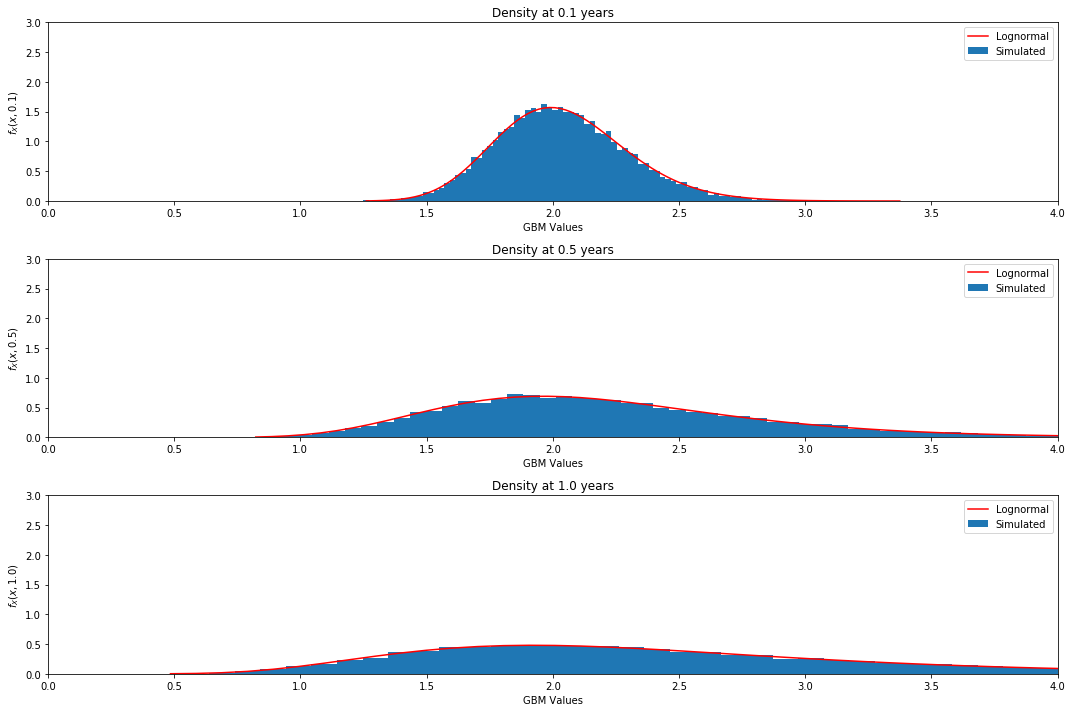

In [23]:
# We compare the simulated distribution of the process with the Log-Gaussian density with the same mean and variance.

# Assign number of bins and edges
minv, maxv, nbins = 0, 4, 200
x = np.linspace(minv,maxv,nbins)

# Fit the times at which to plot the densities
horizon = [20,100,200]

EX1 = np.log(X0)+(mu-sigma**2/2)*t
SD1 = sigma*np.sqrt(t)


# Probability density function of a geometric Brownian motion at different times
fig, ax = plt.subplots(3,figsize=(15,10))

for i,item in enumerate(horizon):

    #Empirical Distribution
    hist,bins,patches = ax[i].hist(X[item,:],100,density=True,label='Simulated')
    bin_centers = (bins[:-1] + bins[1:])*0.5

    #Theoretical Distribution
    f = lognorm.pdf(bin_centers, s = SD1[item],scale = np.exp(EX1[item]))
    ax[i].plot(bin_centers,f,'r',label ='Lognormal')

    #Formatting
    ax[i].set(xlim=[minv,maxv],ylim =[0,3], xlabel='GBM Values', ylabel='$f_X(x,%s)$' %(item/200),
    title = "Density at %s years" %(item/200))
    ax[i].legend()
plt.tight_layout()

## Part 4: Time Evolution of the Density


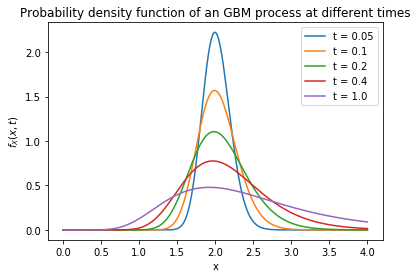

In [14]:
# Assign number of bins and edges
minv, maxv, nbins = 0, 4, 200
x = np.linspace(minv,maxv,nbins)

# Time horizon
t2 = np.array([0.05, 0.1, 0.2, 0.4, 1])

# Theoretical expected value and standard deviation
EX2 = np.log(X0)+(mu-sigma**2/2)*t2
SD2 = sigma*np.sqrt(t2)

# Build theoretical pdf at each time step and then plot
f = np.zeros([len(x),len(t2)])

fig, ax = plt.subplots()
for i in range(len(t2)):
    f[:,i] = lognorm.pdf(x, s = SD2[i],scale = np.exp(EX2[i])) #see book
    ax.plot(x,f[:,i], label = 't = %s' %t2[i])

ax.set(xlabel='x', ylabel='$f_X(x,t)$',
       title='Probability density function of an GBM process at different times')
ax.legend()